#### Test

In [1]:
%%capture

%config InlineBackend.figure_formats = ['svg']

pwd = %pwd
pwd += '/..'

%env TEXINPUTS=$pwd
%env MATPLOTLIBRC=$pwd/matplotlibrc

%matplotlib inline

import matplotlib as mpl

mpl.rc_file('../matplotlibrc')

mpl.use('module://matplotlib_inline.backend_inline')
mpl.style.use('default')

from matplotlib.backends.backend_pgf import FigureCanvasPgf
mpl.backend_bases.register_backend('pdf', FigureCanvasPgf)

import numpy as np
import matplotlib.pyplot as plt
import uncertainties.unumpy as unp
from uncertainties.unumpy import nominal_values as noms, std_devs as stds, uarray as uar

s = np.array([-1e4, 1e4])

Nulleffekt

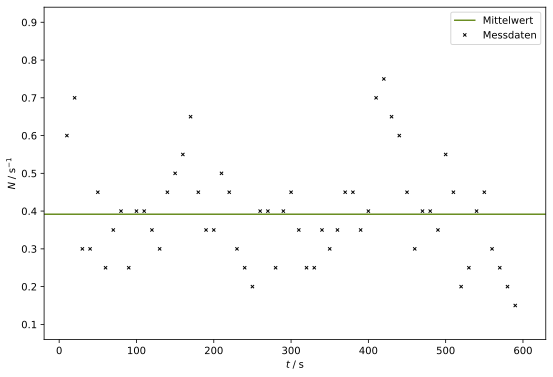

0.39+/-0.19


In [2]:
# rollendes mittel
def smooth(p : int, t, N):
    return t[p-int(p/2)-1:-p+int(p/2)+p%2], np.convolve(N, np.ones(p)/p, mode='valid')


# intervall
t_u = 10

# einlesen
N_u = np.genfromtxt('data/null_10.txt', unpack=True)

# normieren
N_u /= t_u

# zeitschritte
t_u = np.arange(0, t_u * len(N_u), t_u) + t_u

# dimension
plt.figure(figsize=(9, 6))

# grenzen
plt.plot(t_u, N_u, 'kx', ms=0)
x_u = plt.xlim()
y_u = plt.ylim()
plt.xlim(x_u)
plt.ylim(y_u)

# mittelwert
mN_u = uar(np.mean(N_u), np.std(N_u))
plt.plot(s, noms(mN_u) * s / s, c='olivedrab', label='Mittelwert')

# berechnen
t_uu, N_uu = smooth(2, t_u, N_u)

# messpunkte
plt.plot(t_uu, N_uu, 'kx', ms=3.21, label='Messdaten')

# beschriftung
plt.xlabel(r'$t\;/\;$s')
plt.ylabel(r'$N\;/\;$s$^{-1}$')

# anzeigen
plt.legend()
plt.show()
print(mN_u)

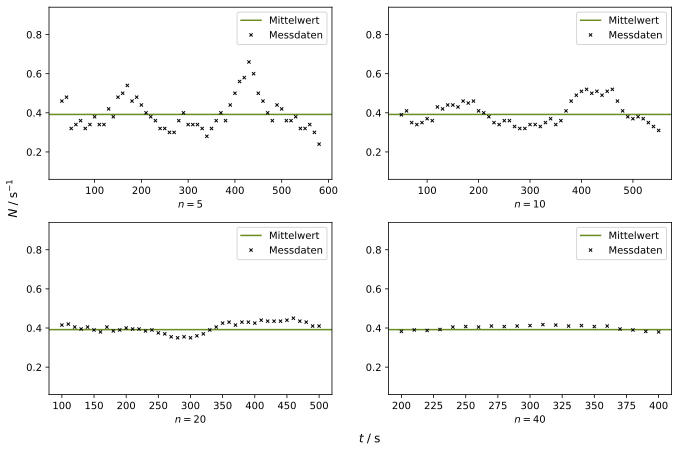

In [3]:
# dimensionen
fig = plt.figure(figsize=(10.5, 7))


# einteilung
ax1 = fig.add_subplot(221)

# berechnen
t_u_5, N_u_5 = smooth(5, t_u, N_u)

# grenzen
plt.plot(t_u_5, N_u_5, 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(y_u)

# mittelwert
plt.plot(s, noms(mN_u) * s / s, c='olivedrab', label='Mittelwert')

# messung
plt.plot(t_u_5, N_u_5, 'kx', ms=3.21, label='Messdaten')

# anzeige
plt.legend()
plt.xlabel('$n = 5$')


#einteilung
ax2 = fig.add_subplot(222)

# berechnen
t_u_10, N_u_10 = smooth(10, t_u, N_u)

# grenzen
plt.plot(t_u_10, N_u_10, 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(y_u)

# mittelwert
plt.plot(s, noms(mN_u) * s / s, c='olivedrab', label='Mittelwert')

# messung
plt.plot(t_u_10, N_u_10, 'kx', ms=3.21, label='Messdaten')

# anzeige
plt.legend()
plt.xlabel('$n = 10$')


# einteilung
ax3 = fig.add_subplot(223)

# berechnen
t_u_20, N_u_20 = smooth(20, t_u, N_u)

# grenzen
plt.plot(t_u_20, N_u_20, 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(y_u)

# mittelwert
plt.plot(s, noms(mN_u) * s / s, c='olivedrab', label='Mittelwert')

# messung
plt.plot(t_u_20, N_u_20, 'kx', ms=3.21, label='Messdaten')

# anzeige
plt.legend()
plt.xlabel('$n = 20$')


# einteilung
ax4 = fig.add_subplot(224)

# berechnen
t_u_40, N_u_40 = smooth(40, t_u, N_u)

# grenzen
plt.plot(t_u_40, N_u_40, 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(y_u)

# mittelwert
plt.plot(s, noms(mN_u) * s / s, c='olivedrab', label='Mittelwert')

# messung
plt.plot(t_u_40, N_u_40, 'kx', ms=3.21, label='Messdaten')

# anzeige
plt.legend()
plt.xlabel('$n = 40$')


# anzeigen
fig.supxlabel(r'$t\;/\;$s')
fig.supylabel(r'$N\;/\;$s$^{-1}$')
plt.subplots_adjust(hspace=0.25, left=0.075)
plt.show()

Vanadium

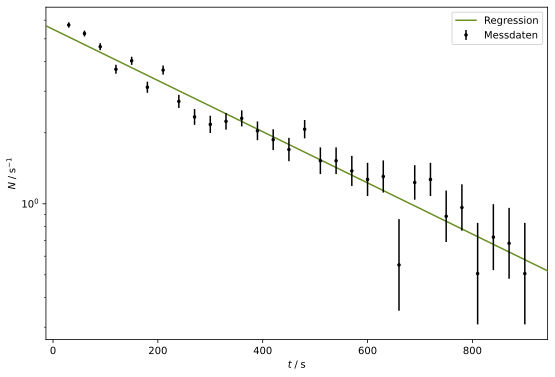

[-0.003034714708558752+/-0.0001635483613067968
 1.7192292799320785+/-0.08710389806887635]


In [4]:
# intervall
t = 30

# einlesen
N = np.genfromtxt('data/v_30.txt', unpack=True)

# normieren
N /= t

# bereinigen
N = N - mN_u

# zeitschritte
t = np.arange(0, t * len(N), t) + t

# dimension
plt.figure(figsize=(9, 6))

# skala konfigurieren
ax1 = plt.subplot(111)
plt.plot(t, noms(N), 'kx', ms=0)
ax1.set(xscale='linear', yscale='log')
ax2 = ax1.twinx()
ax2.axis('off')

# grenzen
plt.errorbar(t, np.log(noms(N)), yerr=stds(unp.log(N)), fmt='k.', ms=0, alpha=0)
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

# regression
par, cov = np.polyfit(t, np.log(noms(N)), 1, cov=True)
err = np.sqrt(np.diag(cov))
rN = uar(par, err)
plt.plot(s, par[0] * s + par[1], c='olivedrab', label='Regression')

# messpunkte
plt.errorbar(t, np.log(noms(N)), yerr=stds(unp.log(N)), fmt='k.', ms=5, label='Messdaten')

# anzeigen
plt.legend()
ax1.set_xlabel(r'$t\;/\;$s')
ax1.set_ylabel(r'$N\;/\;$s$^{-1}$')
plt.show()
print(rN)

In [5]:
# halbwertszeit aus zerfallskonstante
def hwz(lam):
    return unp.log(2) / lam

# zerfallsrate aus achsenabschnitt
def akt(NN):
    return unp.exp(NN)

# berechnen
lam_V = -rN[0]
tau_V = hwz(lam_V)
num_V = rN[1]
stt_V = akt(num_V)

# ausgabe
print(f'\nV-52\n\n\nHalbwertszeit:\n\nlam = {lam_V:.5f}  [1/s]\ntau = {tau_V:.2f}      [s]\n')
print(f'Ergebnis:\n{(tau_V.n - tau_V.n % 60) / 60:.0f} min {tau_V % 60:.0f} s\n')
print(f'Literatur:\n3 min 44.6 s\n\n\nStartaktivität:\n')
print(f'num = {num_V:.3f}   [ln(1/s)]\nstt = {stt_V:.3f}     [1/s]\n')


V-52


Halbwertszeit:

lam = 0.00303+/-0.00016  [1/s]
tau = 228.41+/-12.31      [s]

Ergebnis:
3 min 48+/-12 s

Literatur:
3 min 44.6 s


Startaktivität:

num = 1.719+/-0.087   [ln(1/s)]
stt = 5.580+/-0.486     [1/s]



Rhodium

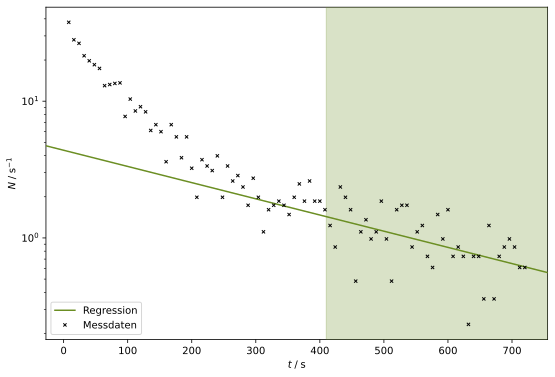

[-0.002725955662035275+/-0.0007979944714027021
 1.4760697255085797+/-0.4589201381693153]


In [6]:
# intervall
t_1 = 8

# einlesen
N_1 = np.genfromtxt('data/rh_8.txt', unpack=True)

# normieren
N_1 /= t_1

# bereinigen
N_1 = N_1 - mN_u

# zeitschritte
t_1 = np.arange(0, t_1 * len(N_1), t_1) + t_1

# dimension
plt.figure(figsize=(9, 6))

# skala konfigurieren
ax1 = plt.subplot(111)
plt.plot(t_1, noms(N_1), 'kx', ms=0)
ax1.set(xscale='linear', yscale='log')
ax2 = ax1.twinx()
ax2.axis('off')

# grenzen
plt.plot(t_1, np.log(noms(N_1)), 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

# markierung
plt.axvspan(410, s[1], color='olivedrab', alpha=0.25)

# regression
rN_1, rt_1 = N_1[t_1 >= 410], t_1[t_1 >= 410]
par_1, cov_1 = np.polyfit(rt_1, np.log(noms(rN_1)), 1, cov=True)
err_1 = np.sqrt(np.diag(cov_1))
rN_1 = uar(par_1, err_1)
plt.plot(s, par_1[0] * s + par_1[1], c='olivedrab', label='Regression')

# messpunkte
plt.plot(t_1, np.log(noms(N_1)), 'kx', ms=3.21, label='Messdaten')

# anzeigen
plt.legend()
ax1.set_xlabel(r'$t\;/\;$s')
ax1.set_ylabel(r'$N\;/\;$s$^{-1}$')
plt.show()
print(rN_1)

In [7]:
# berechnen
lam_Rh_1 = -rN_1[0]
tau_Rh_1 = hwz(lam_Rh_1)
num_Rh_1 = rN_1[1]
stt_Rh_1 = akt(num_Rh_1)

# ausgabe
print(f'\nRh-104\n\n\nHalbwertszeit:\n\nlam = {lam_Rh_1:.5f}  [1/s]\ntau = {tau_Rh_1:.2f}      [s]\n')
print(f'Ergebnis:\n{(tau_Rh_1.n - tau_Rh_1.n % 60) / 60:.0f} min {tau_Rh_1 % 60:.0f} s\n')
print(f'Literatur:\n4 min 20 s\n\n\nStartaktivität:\n')
print(f'num = {num_Rh_1:.3f}   [ln(1/s)]\nstt = {stt_Rh_1:.3f}     [1/s]\n')


Rh-104


Halbwertszeit:

lam = 0.00273+/-0.00080  [1/s]
tau = 254.28+/-74.44      [s]

Ergebnis:
4 min 14+/-74 s

Literatur:
4 min 20 s


Startaktivität:

num = 1.476+/-0.459   [ln(1/s)]
stt = 4.376+/-2.008     [1/s]



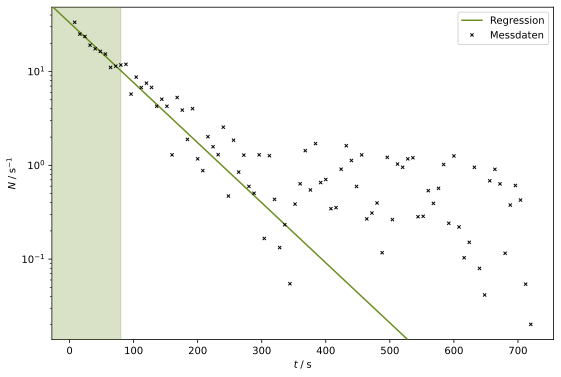

[-0.017028721903255568+/-0.0015319425904546887
 3.499699416504234+/-0.07604363036774604]


In [8]:
# bereinigen
N_1i = N_1 - unp.exp(rN_1[0] * t_1 + rN_1[1])

# dimension
plt.figure(figsize=(9, 6))

# skala konfigurieren
ax1 = plt.subplot(111)
plt.plot(t_1, noms(N_1i), 'kx', ms=0)
ax1.set(xscale='linear', yscale='log')
ax2 = ax1.twinx()
ax2.axis('off')

# grenzen
plt.plot(t_1, np.log(abs(noms(N_1i))), 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

# markierung
plt.axvspan(s[0], 80, color='olivedrab', alpha=0.25)

# regression
rN_1i, rt_1 = N_1i[t_1 <= 80], t_1[t_1 <= 80]
par_1i, cov_1i = np.polyfit(rt_1, np.log(noms(rN_1i)), 1, cov=True)
err_1i = np.sqrt(np.diag(cov_1i))
rN_1i = uar(par_1i, err_1i)
plt.plot(s, par_1i[0] * s + par_1i[1], c='olivedrab', label='Regression')

# messpunkte
plt.plot(t_1, np.log(abs(noms(N_1i))), 'kx', ms=3.21, label='Messdaten')

# anzeigen
plt.legend()
ax1.set_xlabel(r'$t\;/\;$s')
ax1.set_ylabel(r'$N\;/\;$s$^{-1}$')
plt.show()
print(rN_1i)

In [9]:
# berechnen
lam_Rh_1i = -rN_1i[0]
tau_Rh_1i = hwz(lam_Rh_1i)
num_Rh_1i = rN_1i[1]
stt_Rh_1i = akt(num_Rh_1i)

# ausgabe
print(f'\nRh-104i\n\n\nHalbwertszeit:\n\nlam = {lam_Rh_1i:.5f}  [1/s]\ntau = {tau_Rh_1i:.2f}      [s]\n')
print(f'Ergebnis:\n{tau_Rh_1i % 60:.0f} s\n')
print(f'Literatur:\n42.3 s\n\n\nStartaktivität:\n')
print(f'num =  {num_Rh_1i:.3f}   [ln(1/s)]\nstt = {stt_Rh_1i:.3f}     [1/s]\n')


Rh-104i


Halbwertszeit:

lam = 0.01703+/-0.00153  [1/s]
tau = 40.70+/-3.66      [s]

Ergebnis:
41+/-4 s

Literatur:
42.3 s


Startaktivität:

num =  3.500+/-0.076   [ln(1/s)]
stt = 33.105+/-2.517     [1/s]




Bedingung:

t* = 410  [s]
t** = 80  [s]

Ni(t*) = 0.031+/-0.019  [1/s] << N(t*) = 1.4+/-0.8  [1/s]



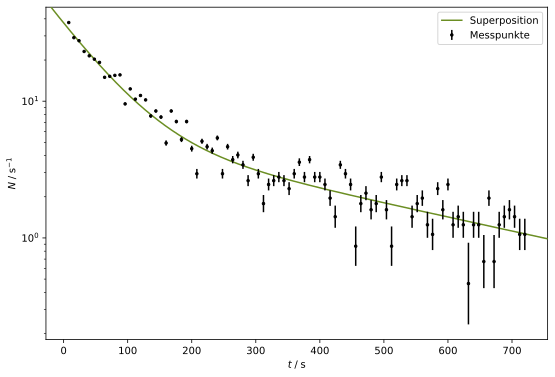

In [10]:
# probe
tt_1 = 410
ttt_1 = 80
print(f'\nBedingung:\n\nt* = {tt_1}  [s]\nt** = {ttt_1}  [s]\n')
print(f'Ni(t*) = {unp.exp(rN_1i[0]*tt_1+rN_1i[1])}  [1/s] << N(t*) = {unp.exp(rN_1[0]*tt_1+rN_1[1])}  [1/s]\n')

# dimension
plt.figure(figsize=(9, 6))

# skala konfigurieren
ax1 = plt.subplot(111)
plt.plot(t_1, noms(N_1), 'kx', ms=0)
ax1.set(xscale='linear', yscale='log')
ax2 = ax1.twinx()
ax2.axis('off')

# grenzen
plt.errorbar(t_1, np.log(noms(N_1)), yerr=stds(unp.log(N_1)), fmt='k.', ms=0, alpha=0)
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

# summenkurve
xx = np.linspace(-100, 800, 9000)
yy = unp.log(unp.exp(rN_1[0] * xx + rN_1[1]) + unp.exp(rN_1i[0] * xx + rN_1i[1]))
plt.plot(xx, noms(yy), c='olivedrab', label='Superposition')

# messpunkte
plt.errorbar(t_1, np.log(noms(N_1)), yerr=stds(unp.log(N_1)), fmt='k.', ms=5, label='Messpunkte')

# anzeigen
plt.legend()
ax1.set_xlabel(r'$t\;/\;$s')
ax1.set_ylabel(r'$N\;/\;$s$^{-1}$')
plt.show()

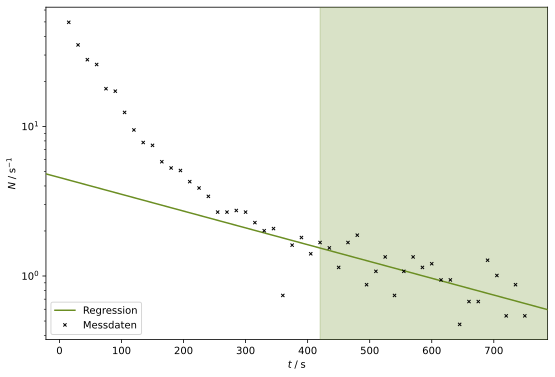

[-0.002585158444970953+/-0.0005879515769190445
 1.5161511852477758+/-0.34889117913220485]


In [11]:
# intervall
t_2 = 15

# einlesen
N_2 = np.genfromtxt('data/rh_15.txt', unpack=True)

# normieren
N_2 /= t_2

# bereinigen
N_2 = N_2 - mN_u

# zeitschritte
t_2 = np.arange(0, t_2 * len(N_2), t_2) + t_2

# dimension
plt.figure(figsize=(9, 6))

# skala konfigurieren
ax1 = plt.subplot(111)
plt.plot(t_2, noms(N_2), 'kx', ms=0)
ax1.set(xscale='linear', yscale='log')
ax2 = ax1.twinx()
ax2.axis('off')

# grenzen
plt.plot(t_2, np.log(noms(N_2)), 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

# markierung
plt.axvspan(420, s[1], color='olivedrab', alpha=0.25)

# regression
rN_2, rt_2 = N_2[t_2 >= 420], t_2[t_2 >= 420]
par_2, cov_2 = np.polyfit(rt_2, np.log(noms(rN_2)), 1, cov=True)
err_2 = np.sqrt(np.diag(cov_2))
rN_2 = uar(par_2, err_2)
plt.plot(s, par_2[0] * s + par_2[1], c='olivedrab', label='Regression')

# messpunkte
plt.plot(t_2, np.log(noms(N_2)), 'kx', ms=3.21, label='Messdaten')

# anzeigen
plt.legend()
ax1.set_xlabel(r'$t\;/\;$s')
ax1.set_ylabel(r'$N\;/\;$s$^{-1}$')
plt.show()
print(rN_2)

In [12]:
# berechnen
lam_Rh_2 = -rN_2[0]
tau_Rh_2 = hwz(lam_Rh_2)
num_Rh_2 = rN_2[1]
stt_Rh_2 = akt(num_Rh_2)

# ausgabe
print(f'\nRh-104\n\n\nHalbwertszeit:\n\nlam = {lam_Rh_2:.5f}  [1/s]\ntau = {tau_Rh_2:.2f}      [s]\n')
print(f'Ergebnis:\n{(tau_Rh_2.n - tau_Rh_2.n % 60) / 60:.0f} min {tau_Rh_2 % 60:.0f} s\n')
print(f'Literatur:\n4 min 20 s\n\n\nStartaktivität:\n')
print(f'num = {num_Rh_2:.3f}   [ln(1/s)]\nstt = {stt_Rh_2:.3f}     [1/s]\n')


Rh-104


Halbwertszeit:

lam = 0.00259+/-0.00059  [1/s]
tau = 268.13+/-60.98      [s]

Ergebnis:
4 min 28+/-61 s

Literatur:
4 min 20 s


Startaktivität:

num = 1.516+/-0.349   [ln(1/s)]
stt = 4.555+/-1.589     [1/s]



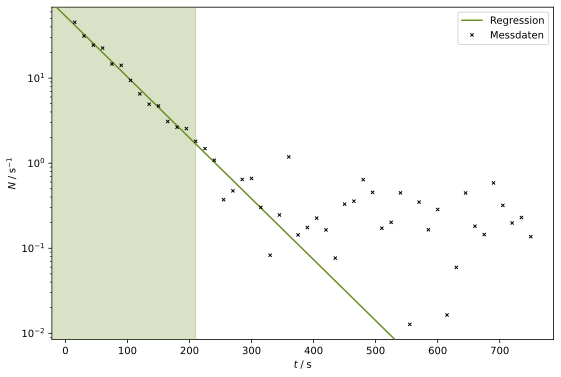

[-0.01701704082789205+/-0.0005069344928621193
 3.9878909691766684+/-0.06474587505872992]


In [13]:
# bereinigen
N_2i = N_2 - unp.exp(rN_2[0] * t_2 + rN_2[1])

# dimension
plt.figure(figsize=(9, 6))

# skala konfigurieren
ax1 = plt.subplot(111)
plt.plot(t_2, noms(N_2i), 'kx', ms=0)
ax1.set(xscale='linear', yscale='log')
ax2 = ax1.twinx()
ax2.axis('off')

# grenzen
plt.plot(t_2, np.log(abs(noms(N_2i))), 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

# markierung
plt.axvspan(s[0], 210, color='olivedrab', alpha=0.25)

# regression
rN_2i, rt_2 = N_2i[t_2 <= 210], t_2[t_2 <= 210]
par_2i, cov_2i = np.polyfit(rt_2, np.log(noms(rN_2i)), 1, cov=True)
err_2i = np.sqrt(np.diag(cov_2i))
rN_2i = uar(par_2i, err_2i)
plt.plot(s, par_2i[0] * s + par_2i[1], c='olivedrab', label='Regression')

# messpunkte
plt.plot(t_2, np.log(abs(noms(N_2i))), 'kx', ms=3.21, label='Messdaten')

# anzeigen
plt.legend()
ax1.set_xlabel(r'$t\;/\;$s')
ax1.set_ylabel(r'$N\;/\;$s$^{-1}$')
plt.show()
print(rN_2i)

In [14]:
# berechnen
lam_Rh_2i = -rN_2i[0]
tau_Rh_2i = hwz(lam_Rh_2i)
num_Rh_2i = rN_2i[1]
stt_Rh_2i = akt(num_Rh_2i)

# ausgabe
print(f'\nRh-104i\n\n\nHalbwertszeit:\n\nlam = {lam_Rh_2i:.5f}  [1/s]\ntau = {tau_Rh_2i:.2f}      [s]\n')
print(f'Ergebnis:\n{tau_Rh_2i % 60:.0f} s\n')
print(f'Literatur:\n42.3 s\n\n\nStartaktivität:\n')
print(f'num =  {num_Rh_2i:.3f}   [ln(1/s)]\nstt = {stt_Rh_2i:.3f}     [1/s]\n')


Rh-104i


Halbwertszeit:

lam = 0.01702+/-0.00051  [1/s]
tau = 40.73+/-1.21      [s]

Ergebnis:
41+/-1 s

Literatur:
42.3 s


Startaktivität:

num =  3.988+/-0.065   [ln(1/s)]
stt = 53.941+/-3.492     [1/s]




Bedingung:

t*  = 420  [s]
t** = 210  [s]

Ni(t*) = 0.042+/-0.009  [1/s] << N(t*) = 1.5+/-0.7  [1/s]



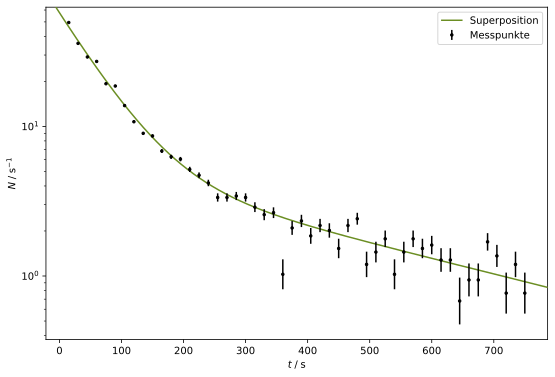

In [15]:
# probe
tt_2 = 420
ttt_2 = 210
print(f'\nBedingung:\n\nt*  = {tt_2}  [s]\nt** = {ttt_2}  [s]\n')
print(f'Ni(t*) = {unp.exp(rN_2i[0]*tt_2+rN_2i[1])}  [1/s] << N(t*) = {unp.exp(rN_2[0]*tt_2+rN_2[1])}  [1/s]\n')

# dimension
plt.figure(figsize=(9, 6))

# skala konfigurieren
ax1 = plt.subplot(111)
plt.plot(t_2, noms(N_2), 'kx', ms=0)
ax1.set(xscale='linear', yscale='log')
ax2 = ax1.twinx()
ax2.axis('off')

# grenzen
plt.errorbar(t_2, np.log(noms(N_2)), yerr=stds(unp.log(N_2)), fmt='k.', ms=0, alpha=0)
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

# summenkurve
xx = np.linspace(-100, 800, 9000)
yy = unp.log(unp.exp(rN_2[0] * xx + rN_2[1]) + unp.exp(rN_2i[0] * xx + rN_2i[1]))
plt.plot(xx, noms(yy), c='olivedrab', label='Superposition')

# messpunkte
plt.errorbar(t_2, np.log(noms(N_2)), yerr=stds(unp.log(N_2)), fmt='k.', ms=5, label='Messpunkte')

# anzeigen
plt.legend()
ax1.set_xlabel(r'$t\;/\;$s')
ax1.set_ylabel(r'$N\;/\;$s$^{-1}$')
plt.show()